# **Installing & Importing Libraries**

In [ ]:
!pip install vecstack

In [ ]:
# data wrangling & pre-processing
#import pandas as pd
#import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

#to split Dataset
from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import xgboost as xgb

import lightgbm
from lightgbm import LGBMClassifier

from vecstack import stacking

#R
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

#Ensemble
from imblearn.metrics import geometric_mean_score
import re
import sklearn
from sklearn.model_selection import StratifiedKFold
import os
from sklearn.calibration import CalibratedClassifierCV

from scipy import stats

import warnings
warnings.filterwarnings('ignore')


# **Loading Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Dataset Diabetes 2019/diabetes_dataset__2019.csv')
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [ ]:
df.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
df.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

# **Profile report**

In [ ]:
#!pip install --upgrade pandas_profiling

In [ ]:
#from pandas_profiling import ProfileReport
#df.profile_report()

# **Data Analysis**

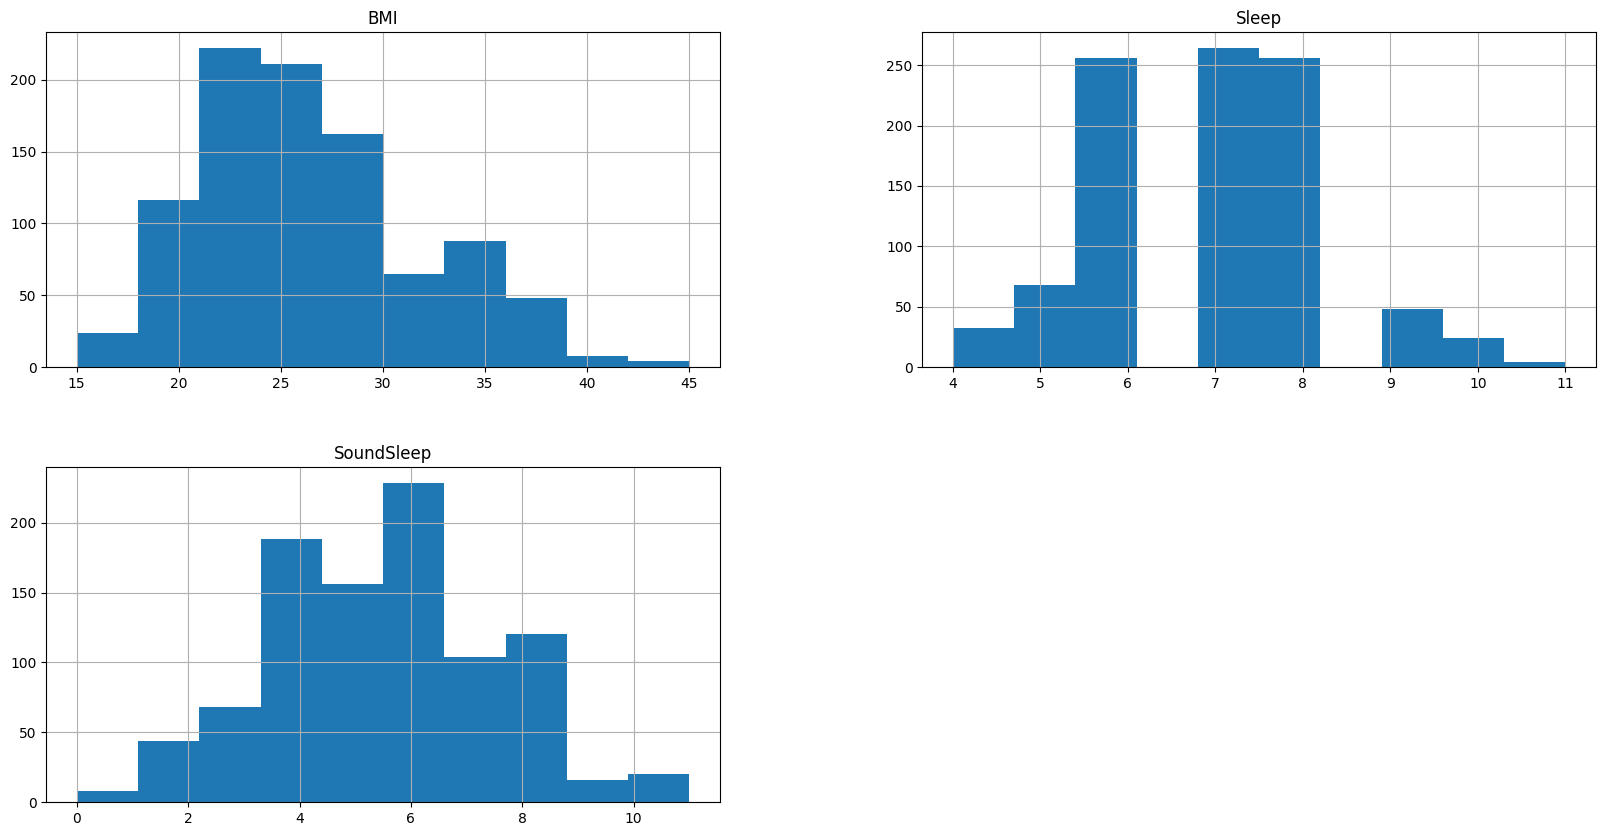

In [ ]:
df[['BMI', 'Sleep','SoundSleep']].hist(figsize=(20,10))
plt.show()

no     684
yes    266
 no      1
Name: Diabetic, dtype: int64
no     685
yes    266
Name: Diabetic, dtype: int64


<Axes: xlabel='Diabetic', ylabel='count'>

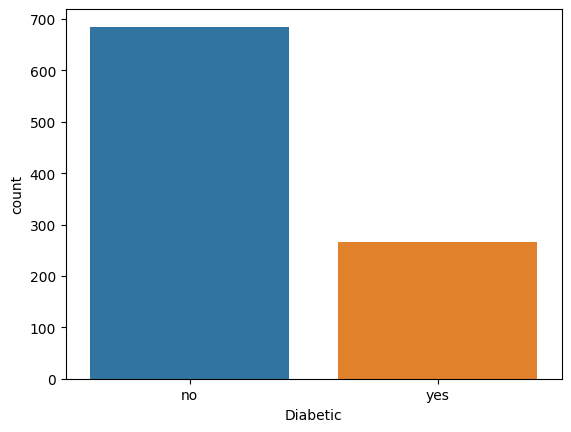

In [ ]:
import seaborn
print(df['Diabetic'].value_counts())
df['Diabetic'].replace(' no', 'no', inplace=True)
print(df['Diabetic'].value_counts())
seaborn.countplot(x = 'Diabetic', data = df)

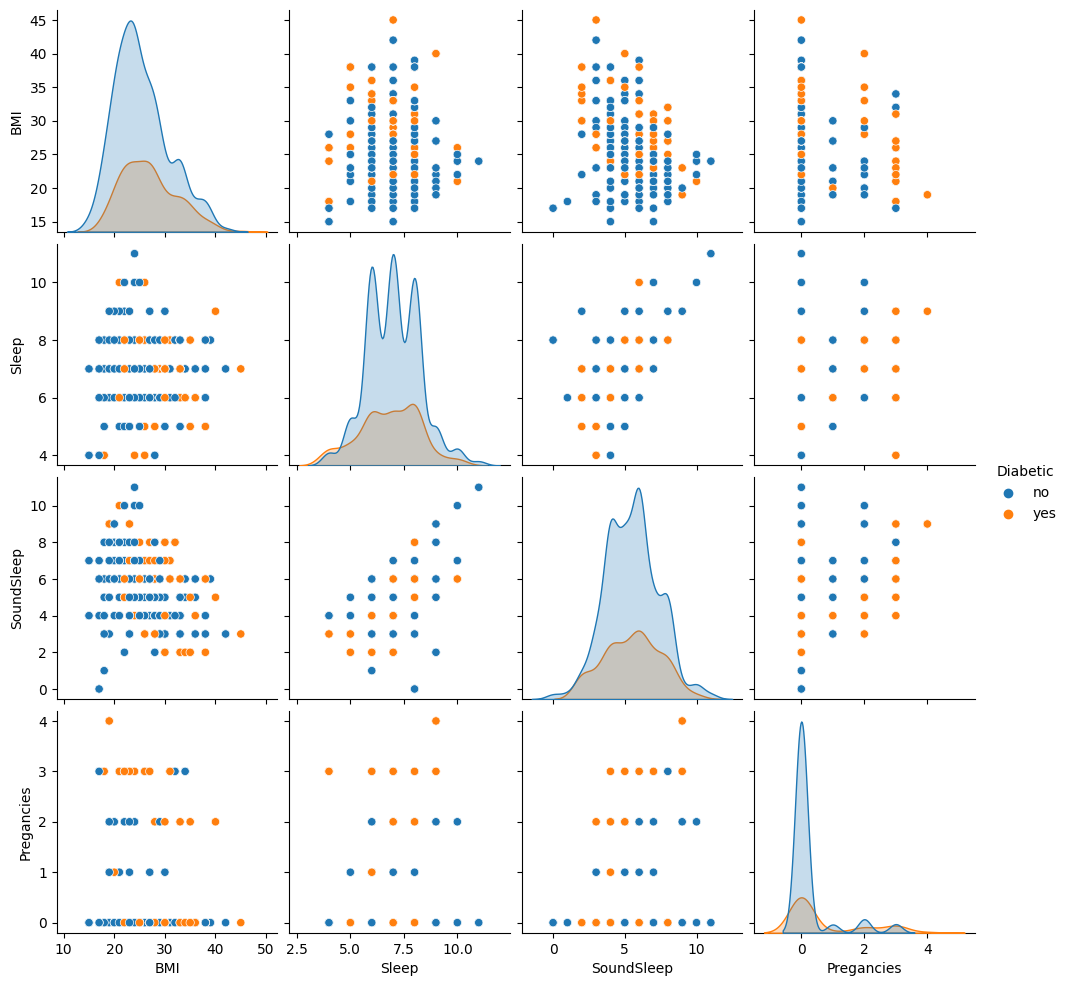

In [ ]:
seaborn.pairplot(data=df, hue='Diabetic')

<Axes: xlabel='Diabetic', ylabel='SoundSleep'>

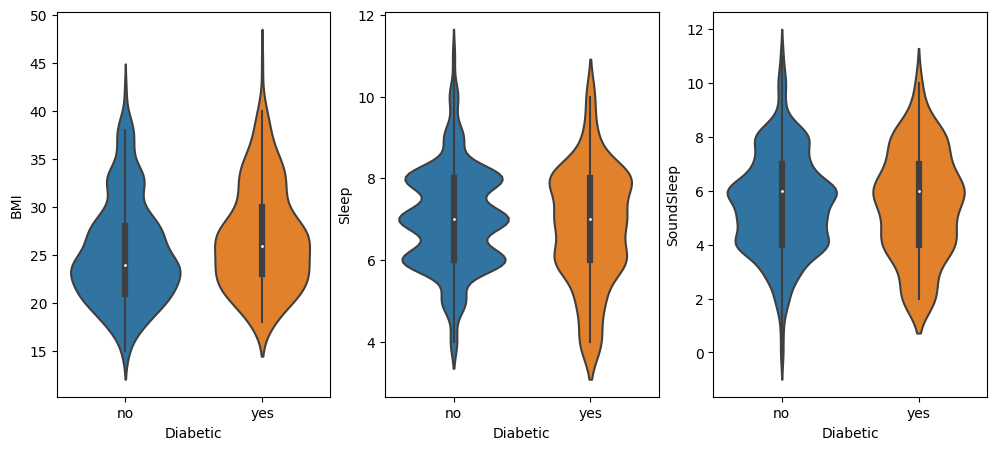

In [ ]:
fig = plt.figure(figsize= (12,5))
plt.subplot(131)
seaborn.violinplot(data = df, x = 'Diabetic', y = 'BMI')
plt.subplot(132)
seaborn.violinplot(data = df, x = 'Diabetic', y = 'Sleep')
plt.subplot(133)
seaborn.violinplot(data = df, x = 'Diabetic', y = 'SoundSleep')

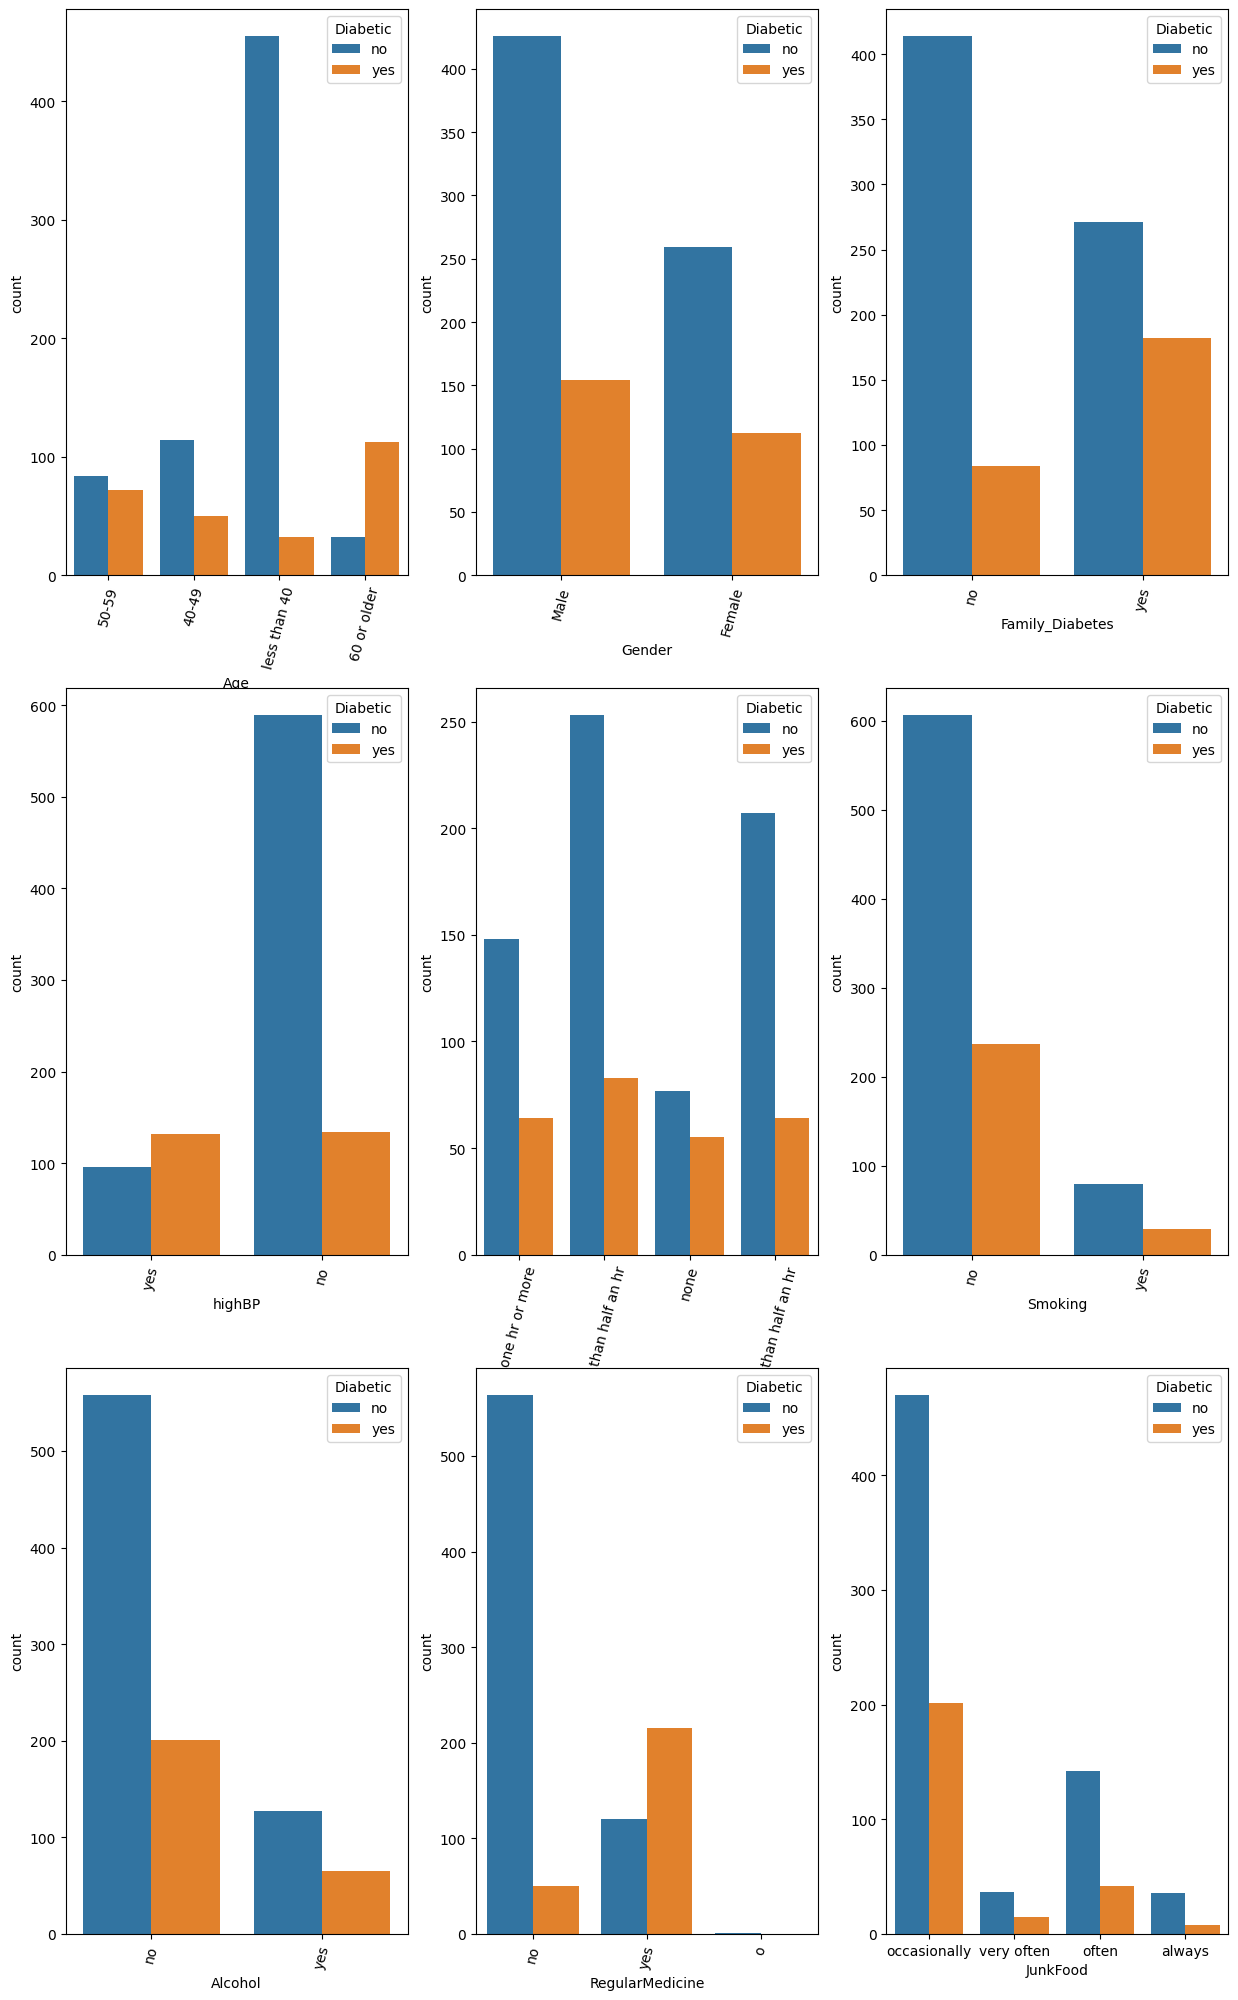

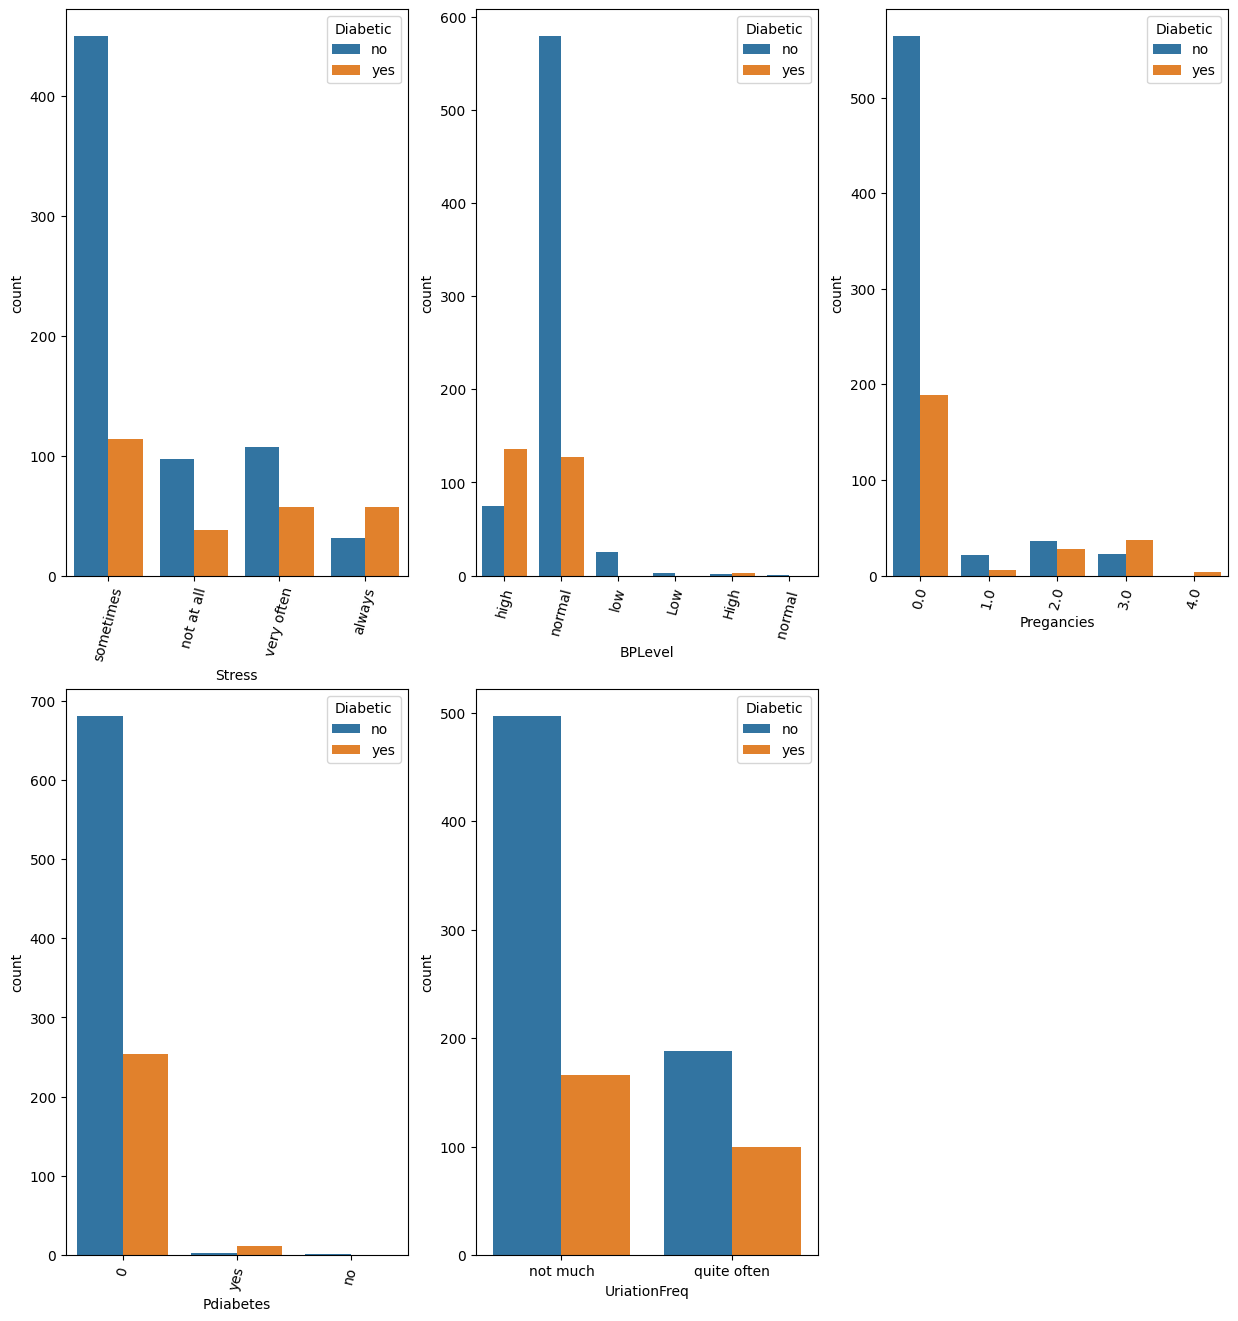

In [ ]:
cols = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive',
       'Smoking', 'Alcohol', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq']

plt.figure(figsize = (15,25))

i  = 0
for j in range(9):
    plt.xticks(rotation=75)
    plt.subplot(int(str(3)+str(3)+str(j+1)))
    seaborn.countplot(x = cols[i], hue='Diabetic',data = df)
    i += 1
plt.show()

plt.figure(figsize = (15,25))
for j in range(5):
    plt.xticks(rotation=75)
    plt.subplot(int(str(3)+str(3)+str(j+1)))
    seaborn.countplot(x = cols[i], hue='Diabetic',data = df)
    i += 1

# **Pre-processing the data**

In [ ]:
standard_df = df.copy()
# y = standard_df['Diabetic_yes']
# x = standard_df.drop(columns = ['Diabetic_yes'])

from sklearn.preprocessing import StandardScaler
cols = ['BMI','Sleep','SoundSleep']
standard_df[cols] = StandardScaler().fit_transform(standard_df[cols].values)
standard_df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,2.451280,no,no,0.825465,0.270402,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,0.414147,no,no,0.825465,0.270402,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,-0.326629,no,no,-0.746220,0.270402,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,-0.511823,no,no,0.825465,0.270402,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,0.228953,no,no,0.825465,1.342997,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,-0.141435,no,no,0.825465,0.270402,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,0.228953,no,no,-0.746220,-0.265895,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,-0.511823,no,no,-0.746220,-0.265895,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,0.228953,no,yes,-0.746220,-0.265895,yes,occasionally,very often,high,0.0,0,not much,no


In [ ]:
df.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

In [ ]:
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [ ]:
df.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [ ]:
indexes = df[df['Diabetic'].isna() | df['Pdiabetes'].isna() | df['BMI'].isna()].index.to_list()

print(indexes)
df.drop(index= indexes,inplace = True)

[113, 116, 121, 122, 134]


In [ ]:
print(df['Pregancies'].value_counts())
df['Pregancies'].fillna(value = 0.0, inplace= True)
print(df['Pregancies'].value_counts())
df['Pregancies'] = df['Pregancies'].astype(int)
df['Pregancies']

0.0    750
2.0     63
3.0     60
1.0     28
4.0      4
Name: Pregancies, dtype: int64
0.0    792
2.0     63
3.0     60
1.0     28
4.0      4
Name: Pregancies, dtype: int64


0      0
1      0
2      0
3      0
4      0
      ..
947    0
948    0
949    0
950    0
951    2
Name: Pregancies, Length: 947, dtype: int64

In [ ]:
print(df['RegularMedicine'].value_counts())
df['RegularMedicine'].replace('o', 'no', inplace =True)
print(df['RegularMedicine'].value_counts())

no     611
yes    335
o        1
Name: RegularMedicine, dtype: int64
no     612
yes    335
Name: RegularMedicine, dtype: int64


In [ ]:
print(df['Pdiabetes'].value_counts())
df['Pdiabetes'].replace('0', 'no', inplace = True)
print(df['Pdiabetes'].value_counts())

0      932
yes     14
no       1
Name: Pdiabetes, dtype: int64
no     933
yes     14
Name: Pdiabetes, dtype: int64


In [ ]:
df = pd.get_dummies(df, drop_first= True)

preg = pd.get_dummies(df['Pregancies'],prefix='Pregnancies',drop_first= True)

print(preg.head())

df = pd.concat([preg,df], axis = 1)
df.drop(columns=['Pregancies'],inplace=True)

   Pregnancies_1  Pregnancies_2  Pregnancies_3  Pregnancies_4
0              0              0              0              0
1              0              0              0              0
2              0              0              0              0
3              0              0              0              0
4              0              0              0              0


# **Train Test Split & Feature normalization & building baseline model**

In [ ]:
y = df['Diabetic_yes']
X = df.drop(columns= ['Diabetic_yes'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
## checking distribution of traget variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
0    545
1    212
Name: Diabetic_yes, dtype: int64
Distribution of target variable in test set
0    137
1     53
Name: Diabetic_yes, dtype: int64


In [ ]:
print('Training Set\n')
print(X_train.shape)
print(y_train.shape)

print('\nTest Set\n')
print(X_test.shape)
print(y_test.shape)

Training Set

(757, 32)
(757,)

Test Set

(190, 32)
(190,)


In [ ]:
print(X.shape)
print(y.shape)

if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(947, 32)
(947,)


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))

    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('DTC' , DecisionTreeClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))

    basedModels.append(('LGBMC', LGBMClassifier()))


    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


    return results,msg

# **Ensembling with Stacked Classifier**

## Baseline models accuracy

In [ ]:
import xgboost as xgb
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train, models)

LR_L2: 0.899614 (0.030747)
LDA: 0.886368 (0.031440)
KNN7: 0.825649 (0.049128)
KNN5: 0.817737 (0.053925)
KNN9: 0.819088 (0.067024)
KNN11: 0.813754 (0.063608)
NB: 0.622211 (0.107128)
SVM Linear: 0.890368 (0.028855)
SVM RBF: 0.908860 (0.029878)
AB: 0.890386 (0.019525)
MLP: 0.915404 (0.024649)
SGD3000: 0.831070 (0.090386)
XGB_2000: 0.956368 (0.018835)
XGB_500: 0.956351 (0.020633)
XGB_100: 0.956404 (0.015671)
XGB_1000: 0.956368 (0.018835)
DTC: 0.958965 (0.018404)
GBM: 0.927298 (0.028593)
RF_Ent100: 0.959000 (0.023319)
RF_Gini100: 0.957702 (0.018546)
ET100: 0.961632 (0.021809)
ET500: 0.961667 (0.016164)
ET1000: 0.960316 (0.020612)
LGBMC: 0.957684 (0.018569)


## Model building

### Random Forest Classifier (criterion = 'entropy')

In [ ]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K nearest neighbour (n=9)

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extra Tree Classifier (n_estimators=100)

In [ ]:
et_500 = ExtraTreesClassifier(n_estimators= 100)
et_500.fit(X_train,y_train)
y_pred_et500 = et_500.predict(X_test)

### XGBoost (n_estimators=2000)

In [ ]:
xgb = xgb.XGBClassifier(n_estimators= 2000)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

### Support Vector Classifier (kernel='linear')

In [ ]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

### Adaboost Classifier

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### Decision Tree Classifier (CART)

In [ ]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### Light Gradient Boosting Machine classifier

In [ ]:
lgbmc = LGBMClassifier()
lgbmc.fit(X_train,y_train)
y_pred_lgbmc = lgbmc.predict(X_test)

### Gradient boosting machine

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

## Model

In [ ]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    #RandomForestClassifier(criterion='entropy',n_estimators=100),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    #ExtraTreesClassifier(n_estimators= 1000),
    ExtraTreesClassifier(n_estimators= 500),
    #ExtraTreesClassifier(n_estimators= 100),

    #KNeighborsClassifier(9),
    #MLPClassifier(),
    #xgboost.XGBClassifier(),
    #xgboost.XGBClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 500),
    #xgboost.XGBClassifier(n_estimators= 1000),
    #xgboost.XGBClassifier(n_estimators= 2000),

    #SGDClassifier(max_iter=1000, tol=1e-4),
    #SVC(kernel='linear',gamma='auto',probability=True),
    #AdaBoostClassifier(),

    DecisionTreeClassifier(),
    LGBMClassifier(),
    #LinearDiscriminantAnalysis(),
    #GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),

]

In [ ]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=5,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [RandomForestClassifier]
    fold  0:  [0.98026316]
    fold  1:  [0.95394737]
    fold  2:  [0.95364238]
    fold  3:  [0.96026490]
    fold  4:  [0.97350993]
    ----
    MEAN:     [0.96432555] + [0.01073951]
    FULL:     [0.96433289]

model  1:     [ExtraTreesClassifier]
    fold  0:  [0.98026316]
    fold  1:  [0.95394737]
    fold  2:  [0.95364238]
    fold  3:  [0.96688742]
    fold  4:  [0.97350993]
    ----
    MEAN:     [0.96565005] + [0.01056398]
    FULL:     [0.96565390]

model  2:     [XGBClassifier]
    fold  0:  [0.97368421]
    fold  1:  [0.94736842]
    fold  2:  [0.95364238]
    fold  3:  [0.96026490]
    fold  4:  [0.96688742]
    ----
    MEAN:     [0.96036947] + [0.00931727]
    FULL:     [0.96036988]

model  3:     [DecisionTreeClassifier]
    fold  0:  [0.97368421]
    fold  1:  [0.94736842]
    fold  2:  [0.94701987]
    

In [ ]:
# initializing generalizer model i.e., __ classifier in our case
model = LGBMClassifier()

model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.95789474]


## Model Evaluation

,Model,Accuracy,Precision,ROC-AUC,Sensitivity,Specificity,F1 Score,Log_Loss,mathew_corrcoef
0,Stacked Classifier,0.957895,0.924528,0.947666,0.924528,0.970803,0.924528,1.517628,0.895331


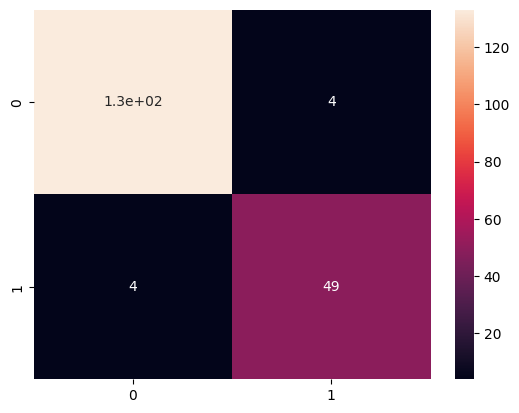

In [ ]:
CM=confusion_matrix(y_test,y_pred)
seaborn.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

mathew = matthews_corrcoef(y_test, y_pred)
model_results =pd.DataFrame([['Stacked Classifier',acc, prec,roc,rec,specificity, f1, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision','ROC-AUC', 'Sensitivity','Specificity', 'F1 Score','Log_Loss','mathew_corrcoef'])

model_results

## Comparison with other Models

In [ ]:
data = {'Random Forest': y_pred_rfe,
        'EXtra tree classifier': y_pred_et500,
        'Decision Tree Classifier': y_pred_decc,
        'LGBM Classifier': y_pred_lgbmc,
        'GBM': y_pred_gbm,
        'XGB': y_pred_xgb,


                'KNN': y_pred_knn,
                'MLP': y_pred_mlp,
                'SVC': y_pred_svc,
                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada }

models = pd.DataFrame(data)

for column in models:
    CM=confusion_matrix(y_test,models[column])

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])

    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,roc,rec,specificity, f1, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision','ROC-AUC', 'Sensitivity','Specificity', 'F1 Score','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results


,Model,Accuracy,Precision,ROC-AUC,Sensitivity,Specificity,F1 Score,Log_Loss,mathew_corrcoef
0,Stacked Classifier,0.957895,0.924528,0.947666,0.924528,0.970803,0.924528,1.517628,0.895331
1,Random Forest,0.957895,0.924528,0.947666,0.924528,0.970803,0.924528,1.517628,0.895331
2,EXtra tree classifier,0.957895,0.924528,0.947666,0.924528,0.970803,0.924528,1.517628,0.895331
3,Decision Tree Classifier,0.936842,0.859649,0.933067,0.924528,0.941606,0.890909,2.276441,0.847657
4,LGBM Classifier,0.942105,0.888889,0.930932,0.905660,0.956204,0.897196,2.086738,0.856981
5,GBM,0.915789,0.849057,0.895331,0.849057,0.941606,0.849057,3.035255,0.790662
6,XGB,0.952632,0.892857,0.949800,0.943396,0.956204,0.917431,1.707331,0.884915
7,KNN,0.747368,0.580645,0.622366,0.339623,0.905109,0.428571,9.105765,0.297036
8,MLP,0.931579,0.900000,0.906280,0.849057,0.963504,0.873786,2.466145,0.827570
9,SVC,0.873684,0.871795,0.802507,0.641509,0.963504,0.739130,4.552883,0.671803


### ROC AUC Curve

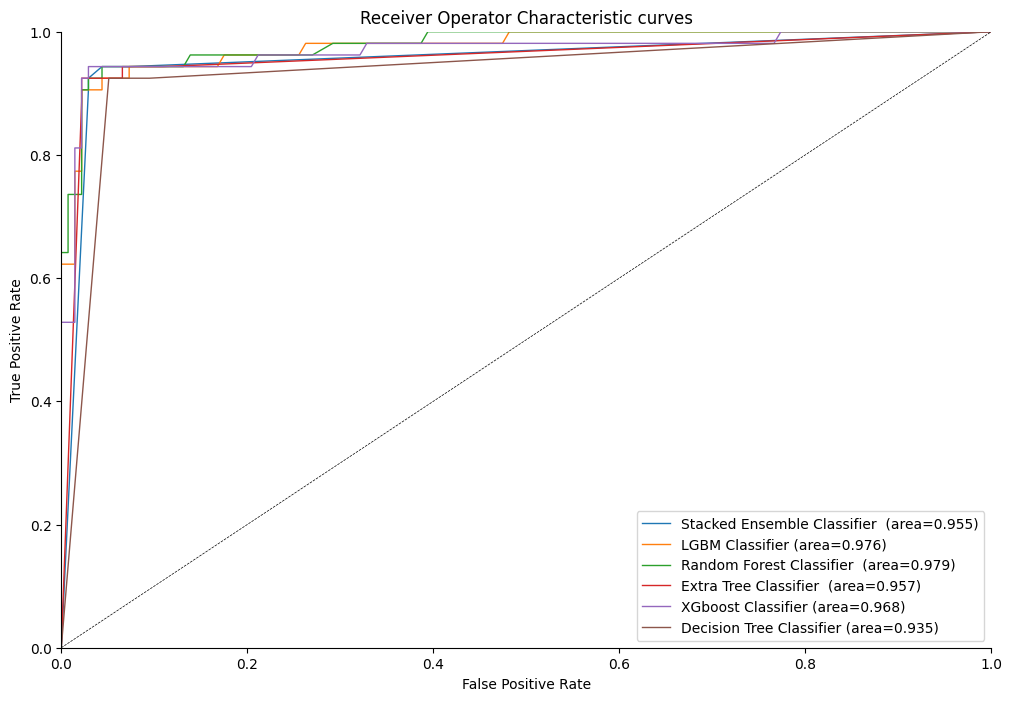

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,model.predict_proba(S_test),label='Stacked Ensemble Classifier ',l='-')
roc_auc_plot(y_test,lgbmc.predict_proba(X_test),label='LGBM Classifier',l='-')

roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost Classifier',l='-')


roc_auc_plot(y_test,decc.predict_proba(X_test),label='Decision Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
seaborn.despine()

### Precision Recall curve

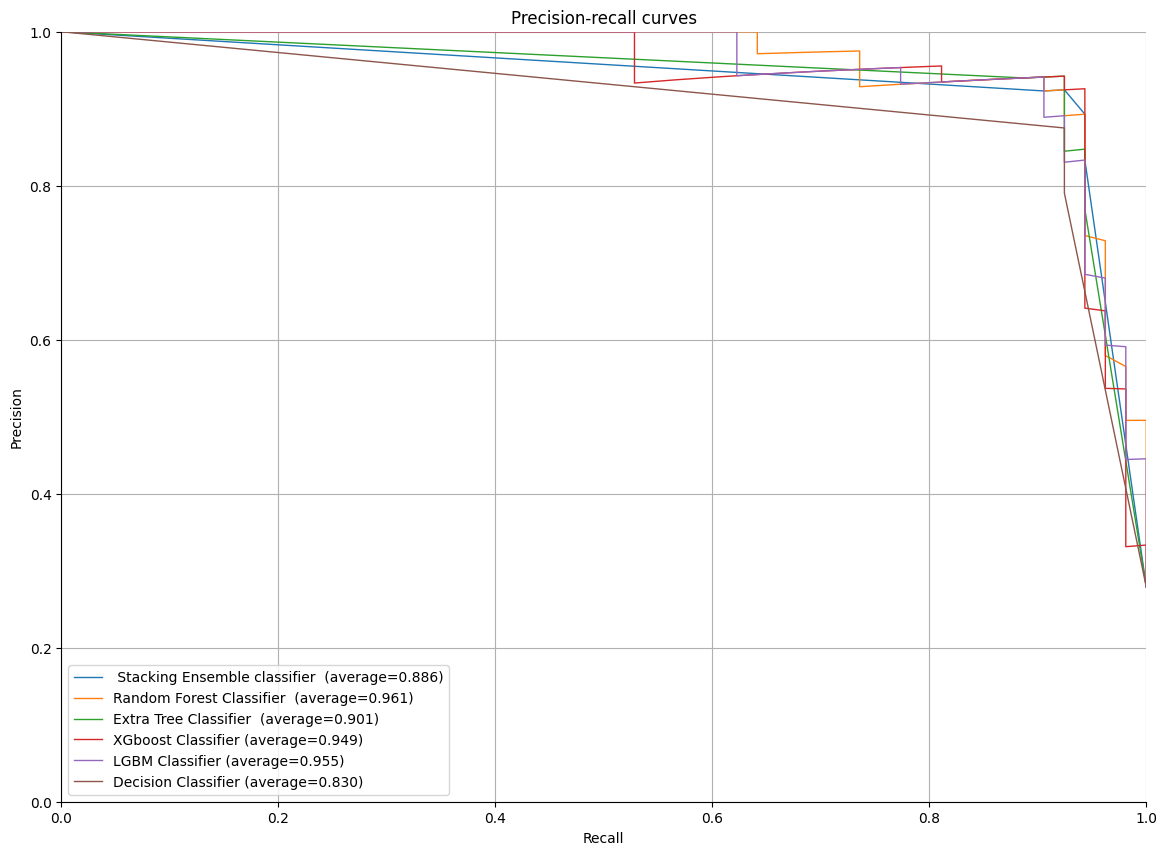

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))



precision_recall_plot(y_test,model.predict_proba(S_test),label=' Stacking Ensemble classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')

precision_recall_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost Classifier',l='-')

precision_recall_plot(y_test,lgbmc.predict_proba(X_test),label='LGBM Classifier',l='-')
precision_recall_plot(y_test,decc.predict_proba(X_test),label='Decision Classifier',l='-')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
seaborn.despine()